# Assignment 3

Install the Transformers, Datasets, and Evaluate libraries to run this notebook.

In [1]:
!pip install datasets evaluate transformers[sentencepiece]
!apt install git-lfs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 KB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 95.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 11.0 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
Reading package lis

In [2]:
from datasets import load_dataset, DatasetDict

ds_train = load_dataset("huggingface-course/codeparrot-ds-train", split="train")
ds_valid = load_dataset("huggingface-course/codeparrot-ds-valid", split="validation")

raw_datasets = DatasetDict(
    {
        "train": ds_train.shuffle(seed=42).select(range(50000)),
        "valid": ds_valid.shuffle(seed=42).select(range(500))
    }
)

raw_datasets

Computing checksums: 100%|##########| 1/1 [00:39<00:00, 39.63s/it]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/huggingface-course___json/huggingface-course--codeparrot-ds-train-7e9fc5dfe436a81a/0.0.0/0f7e3662623656454fcd2b650f34e886a7db4b9104504885bd462096cc7a9f51. Subsequent calls will reuse this data.


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/huggingface-course___json/huggingface-course--codeparrot-ds-valid-65557c3279496c87/0.0.0/0f7e3662623656454fcd2b650f34e886a7db4b9104504885bd462096cc7a9f51. Subsequent calls will reuse this data.


DatasetDict({
    train: Dataset({
        features: ['repo_name', 'path', 'copies', 'size', 'content', 'license'],
        num_rows: 50000
    })
    valid: Dataset({
        features: ['repo_name', 'path', 'copies', 'size', 'content', 'license'],
        num_rows: 500
    })
})

In [3]:
for key in raw_datasets["train"][0]:
    print(f"{key.upper()}: {raw_datasets['train'][0][key][:200]}")

REPO_NAME: ThomasMiconi/htmresearch
PATH: projects/feedback/feedback_sequences.py
COPIES: 2
SIZE: 26875
CONTENT: 
# Numenta Platform for Intelligent Computing (NuPIC)
# Copyright (C) 2016, Numenta, Inc.  Unless you have an agreement
# with Numenta, Inc., for a separate license for this software code, the
# follo
LICENSE: agpl-3.0


In [4]:
from transformers import AutoTokenizer

context_length = 128
tokenizer = AutoTokenizer.from_pretrained("huggingface-course/code-search-net-tokenizer")

outputs = tokenizer(
    raw_datasets["train"][:2]["content"],
    truncation=True,
    max_length=context_length,
    return_overflowing_tokens=True,
    return_length=True,
)

print(f"Input IDs length: {len(outputs['input_ids'])}")
print(f"Input chunk lengths: {(outputs['length'])}")
print(f"Chunk mapping: {outputs['overflow_to_sample_mapping']}")

Downloading:   0%|          | 0.00/265 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/789k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/448k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

Input IDs length: 86
Input chunk lengths: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 17, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 2]
Chunk mapping: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [5]:
def tokenize(element):
    outputs = tokenizer(
        element["content"],
        truncation=True,
        max_length=context_length,
        return_overflowing_tokens=True,
        return_length=True,
    )
    input_batch = []
    for length, input_ids in zip(outputs["length"], outputs["input_ids"]):
        if length == context_length:
            input_batch.append(input_ids)
    return {"input_ids": input_batch}


tokenized_datasets = raw_datasets.map(
    tokenize, batched=True, remove_columns=raw_datasets["train"].column_names
)
tokenized_datasets

  0%|          | 0/50 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['input_ids'],
        num_rows: 1375550
    })
    valid: Dataset({
        features: ['input_ids'],
        num_rows: 13617
    })
})

In [6]:
from transformers import AutoTokenizer, GPT2LMHeadModel, AutoConfig

config = AutoConfig.from_pretrained(
    "gpt2",
    vocab_sizse=len(tokenizer),
    n_ctx=context_length,
    bos_token_id=tokenizer.bos_token_id,
    eos_token_id=tokenizer.eos_token_id,
)

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

In [7]:
model = GPT2LMHeadModel(config)
model_size = sum(t.numel() for t in model.parameters())
print(f"GPT-2 size: {model_size/1000**2:.1f}M parameters")

GPT-2 size: 124.4M parameters


In [8]:
from transformers import DataCollatorForLanguageModeling

tokenizer.pad_token = tokenizer.eos_token
data_collator = DataCollatorForLanguageModeling(tokenizer, mlm=False)

In [9]:
out = data_collator([tokenized_datasets["train"][i] for i in range(5)])
for key in out:
    print(f"{key} shape: {out[key].shape}")

You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


input_ids shape: torch.Size([5, 128])
attention_mask shape: torch.Size([5, 128])
labels shape: torch.Size([5, 128])


#Training 

Possible Optimizers to try 
Optimizers = adamw_hf, adamw_torch, adamw_apex_fused, adamw_anyprecision or adafactor.

modify max_steps to stop after a number of iterations

modify batch size to fit into memory
modify save every n steps to modify how often save occurs

modify output_dir to a google drive path to save and load the model correctly

In [10]:
from transformers import Trainer, TrainingArguments

args = TrainingArguments(
    output_dir="codeparrot-ds",
    optim= 'adamw_hf',
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    evaluation_strategy="steps",
    eval_steps=5_000,
    logging_steps=1,
    gradient_accumulation_steps=8,
    num_train_epochs=1,
    weight_decay=0.1,
    warmup_steps=100,
    lr_scheduler_type="cosine",
    learning_rate=5e-4,
    save_steps=100,
    fp16=True,
    max_steps=500, 
)
trainer = Trainer(
    model=model,
    tokenizer=tokenizer,
    args=args,
    data_collator=data_collator,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["valid"],
  
)

max_steps is given, it will override any value given in num_train_epochs
Using cuda_amp half precision backend


In [11]:
result = trainer.train()

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 1375550
  Num Epochs = 1
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 128
  Gradient Accumulation steps = 8
  Total optimization steps = 500
  Number of trainable parameters = 124439808


Step,Training Loss,Validation Loss


Saving model checkpoint to codeparrot-ds/checkpoint-100
Configuration saved in codeparrot-ds/checkpoint-100/config.json
Model weights saved in codeparrot-ds/checkpoint-100/pytorch_model.bin
tokenizer config file saved in codeparrot-ds/checkpoint-100/tokenizer_config.json
Special tokens file saved in codeparrot-ds/checkpoint-100/special_tokens_map.json
Saving model checkpoint to codeparrot-ds/checkpoint-200
Configuration saved in codeparrot-ds/checkpoint-200/config.json
Model weights saved in codeparrot-ds/checkpoint-200/pytorch_model.bin
tokenizer config file saved in codeparrot-ds/checkpoint-200/tokenizer_config.json
Special tokens file saved in codeparrot-ds/checkpoint-200/special_tokens_map.json
Saving model checkpoint to codeparrot-ds/checkpoint-300
Configuration saved in codeparrot-ds/checkpoint-300/config.json
Model weights saved in codeparrot-ds/checkpoint-300/pytorch_model.bin
tokenizer config file saved in codeparrot-ds/checkpoint-300/tokenizer_config.json
Special tokens file 

In [12]:
eval_results = trainer.evaluate()

***** Running Evaluation *****
  Num examples = 13617
  Batch size = 16


In [13]:
!pip install ml-things
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 63.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 98.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.0/296.0 KB 34.1 MB/s eta 0:00:00
  Created wheel for ml-things: filename=ml_things-0.0.1-py3-none-any.whl size=24418 sha256=e1a078992d4bae1a85f09f40896c828e6f779f94980647178876be56005887bd
  Stored in directory: /root/.cache/pip/wheels/b0/13/72/06f860cf08870a4fda0b121a69ea707854dc2591e46dd6f696
Successfully built ml-things
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 67.2 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.2
    Uninstalling matplotlib-3.6.2:
      Successfully uninstalled matplotlib-3.6.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ml-things 0.0.1 requires matplotlib>=3.4.0, but you have matplotlib 3.1.3 which is incompatible.


/usr/local/lib/python3.8/dist-packages/ml_things/plot_functions.py:409: DeprecationWarning: `magnify` needs to have value in [0,1]! `2` will be converted to `0.1` as default.
  warnings.warn(f'`magnify` needs to have value in [0,1]! `{magnify}` will be converted to `0.1` as default.',


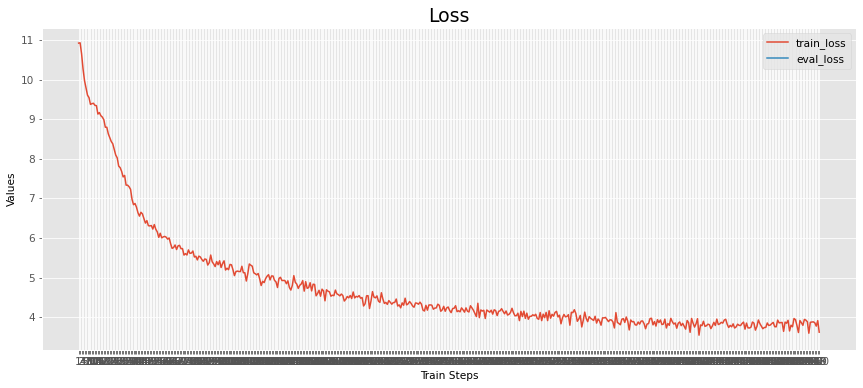

/usr/local/lib/python3.8/dist-packages/ml_things/plot_functions.py:409: DeprecationWarning: `magnify` needs to have value in [0,1]! `2` will be converted to `0.1` as default.
  warnings.warn(f'`magnify` needs to have value in [0,1]! `{magnify}` will be converted to `0.1` as default.',


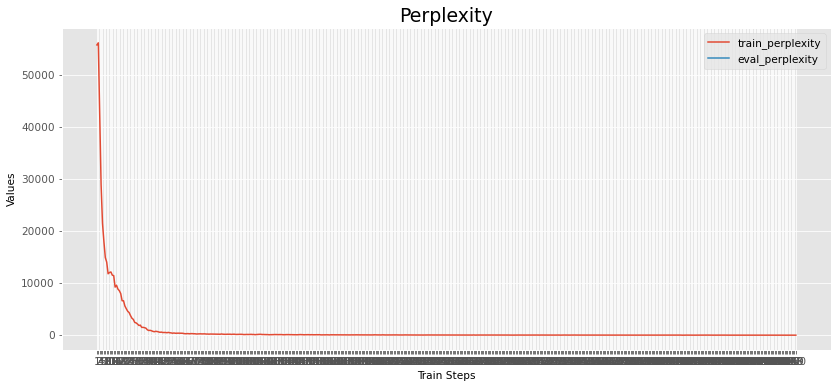

In [14]:
from matplotlib import pyplot as plot
import math 
from ml_things import plot_dict, fix_text
# Keep track of train and evaluate loss.
loss_history = {'train_loss':[], 'eval_loss':[]}

# Keep track of train and evaluate perplexity.
# This is a metric useful to track for language models.
perplexity_history = {'train_perplexity':[], 'eval_perplexity':[]}

# Loop through each log history.
for log_history in trainer.state.log_history:

  if 'loss' in log_history.keys():
    # Deal with trianing loss.
    loss_history['train_loss'].append(log_history['loss'])
    perplexity_history['train_perplexity'].append(math.exp(log_history['loss']))
    
  elif 'eval_loss' in log_history.keys():
    # Deal with eval loss.
    loss_history['eval_loss'].append(log_history['eval_loss'])
    perplexity_history['eval_perplexity'].append(math.exp(log_history['eval_loss']))

# Plot Losses.
plot_dict(loss_history, start_step=args.logging_steps, 
          step_size=args.logging_steps, use_title='Loss', 
          use_xlabel='Train Steps', use_ylabel='Values', magnify=2)

print()

# Plot Perplexities.
plot_dict(perplexity_history, start_step=args.logging_steps, 
          step_size=args.logging_steps, use_title='Perplexity', 
          use_xlabel='Train Steps', use_ylabel='Values', magnify=2)


#Report Perplexity and eval_results number with each experiment

In [15]:
import numpy as np
print(f"Perplexity: {np.exp(eval_results['eval_loss']):.2f}")

Perplexity: 43.13


In [16]:
result

TrainOutput(global_step=500, training_loss=4.742955354690552, metrics={'train_runtime': 943.618, 'train_samples_per_second': 67.824, 'train_steps_per_second': 0.53, 'total_flos': 4180672512000000.0, 'train_loss': 4.742955354690552, 'epoch': 0.05})

In [17]:
trainer.state.log_history

[{'loss': 10.928, 'learning_rate': 5e-06, 'epoch': 0.0, 'step': 1},
 {'loss': 10.9352, 'learning_rate': 1e-05, 'epoch': 0.0, 'step': 2},
 {'loss': 10.6595, 'learning_rate': 1.5e-05, 'epoch': 0.0, 'step': 3},
 {'loss': 10.2714, 'learning_rate': 2e-05, 'epoch': 0.0, 'step': 4},
 {'loss': 9.9759, 'learning_rate': 2.5e-05, 'epoch': 0.0, 'step': 5},
 {'loss': 9.7984, 'learning_rate': 3e-05, 'epoch': 0.0, 'step': 6},
 {'loss': 9.6113,
  'learning_rate': 3.5000000000000004e-05,
  'epoch': 0.0,
  'step': 7},
 {'loss': 9.5501, 'learning_rate': 4e-05, 'epoch': 0.0, 'step': 8},
 {'loss': 9.3774,
  'learning_rate': 4.4999999999999996e-05,
  'epoch': 0.0,
  'step': 9},
 {'loss': 9.3976, 'learning_rate': 5e-05, 'epoch': 0.0, 'step': 10},
 {'loss': 9.4059, 'learning_rate': 5.5e-05, 'epoch': 0.0, 'step': 11},
 {'loss': 9.3543, 'learning_rate': 6e-05, 'epoch': 0.0, 'step': 12},
 {'loss': 9.3461,
  'learning_rate': 6.500000000000001e-05,
  'epoch': 0.0,
  'step': 13},
 {'loss': 9.1336,
  'learning_rate'

Example to load from checkpoint 
Note: move to Drive and get Drive path first

# Test Code Prompts 

Model and Tokenizer must be present

In [18]:
import torch
from transformers import pipeline

device =  torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print(device)
pipe = pipeline(
    "text-generation",
     model=model,
     tokenizer=tokenizer,
      device=device
)

cuda:0


In [19]:
txt = """\
# create some data
x = np.random.randn(100)
y = np.random.randn(100)

# create scatter plot with x, y
"""
print(pipe(txt, num_return_sequences=1)[0]["generated_text"])

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
/usr/local/lib/python3.8/dist-packages/transformers/generation/utils.py:1387: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 50 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


# create some data
x = np.random.randn(100)
y = np.random.randn(100)

# create scatter plot with x, y

X, y = make_blobs(seed=False)


In [20]:
txt = """\
# create some data
x = np.random.randn(100)
y = np.random.randn(100)

# create dataframe from x and y
"""
print(pipe(txt, num_return_sequences=1)[0]["generated_text"])

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


# create some data
x = np.random.randn(100)
y = np.random.randn(100)

# create dataframe from x and y

# Add to be positive (C) data
x2 =


In [21]:
txt = """\
# dataframe with profession, income and name
df = pd.DataFrame({'profession': x, 'income':y, 'name': z})

# calculate the mean income per profession
"""
print(pipe(txt, num_return_sequences=1)[0]["generated_text"])

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


# dataframe with profession, income and name
df = pd.DataFrame({'profession': x, 'income':y, 'name': z})

# calculate the mean income per profession
iris = iris.target


In [22]:
txt = """
# import random forest regressor from scikit-learn
from sklearn.ensemble import RandomForestRegressor

# fit random forest model with 300 estimators on X, y:
"""
print(pipe(txt, num_return_sequences=1)[0]["generated_text"])

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



# import random forest regressor from scikit-learn
from sklearn.ensemble import RandomForestRegressor

# fit random forest model with 300 estimators on X, y:
# data labels as classes
for n_classes in np.random.
